In [1]:
!pip install kagglehub

In [4]:
import pandas as pd
import os
import kagglehub

# Step 1: Download dataset
path = kagglehub.dataset_download("yasserh/titanic-dataset")

df = pd.read_csv(os.path.join(path,'Titanic-Dataset.csv' ))

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df['Age']=df['Age'].fillna(df.Age.mean())

In [16]:
df['Cabin'].fillna(method='ffill', inplace=True)

C:\Users\priya\AppData\Local\Temp\ipykernel_16424\1914796026.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna(method='ffill', inplace=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_16424\1914796026.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Cabin'].fillna(method='ffill', inplace=True)


In [17]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            1
Embarked         2
Deck           687
dtype: int64

In [20]:
df.drop('Deck',axis=1,inplace=True)

In [23]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       2
dtype: int64

In [24]:
df.dropna(inplace=True)

In [25]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [27]:
df.shape

(888, 12)

In [29]:
df=pd.get_dummies(df,columns=['Sex','Embarked','Pclass'],drop_first=True)

In [30]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,C85,False,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,False,False,True,False,False
4,5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,C123,True,False,True,False,True
5,6,0,"Moran, Mr. James",29.699118,0,0,330877,8.4583,C123,True,True,False,False,True


In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cols_to_scale=['Fare']
df[cols_to_scale]=sc.fit_transform(df[cols_to_scale])

In [34]:
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,0.788051,C85,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,-0.487008,C85,False,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,0.422120,C123,False,False,True,False,False
4,5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,-0.484492,C123,True,False,True,False,True
5,6,0,"Moran, Mr. James",29.699118,0,0,330877,-0.476275,C123,True,True,False,False,True


In [37]:
columns_numeric=['Age','Fare']

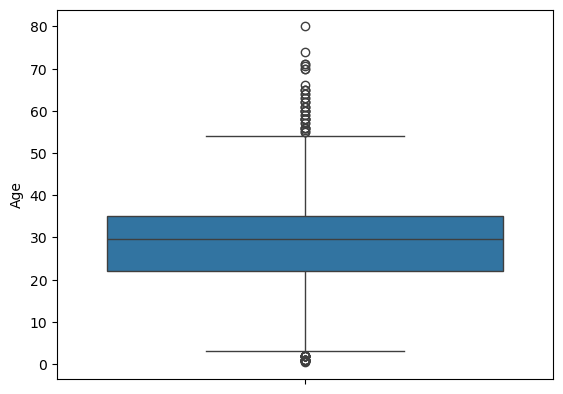

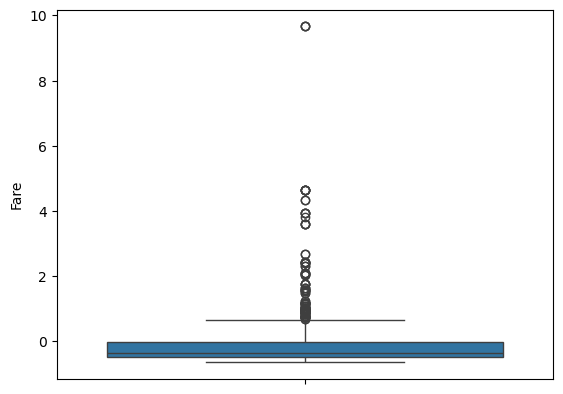

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in columns_numeric:
    sns.boxplot(df[col])
    plt.show()